In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path

In [2]:
data_dir = Path('klasy').resolve()
print(data_dir)
IMG_SIZE = 100 #chce znalezc idealna proporcje pomiedzy rozmiaarem danych a jakoscia predykcji (szybkoscia a jakoscia)

C:\Users\marci\Desktop\IT@Studies\przetwarz.obraz.laby\widzenie komputerowe\deep learning\klasy


In [3]:
X, y = [], []
for dir in data_dir.iterdir(): #iteruje po klasach 
    for file in dir.iterdir():
        img = cv2.imread(str(file))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
        X.append(img)
        y.append(dir.name) # dodaje nazwę folderu do y

X = np.array(X) 
y = np.array(y).reshape(-1, 1) 
X.shape, y.shape

((25, 100, 100, 3), (25, 1))

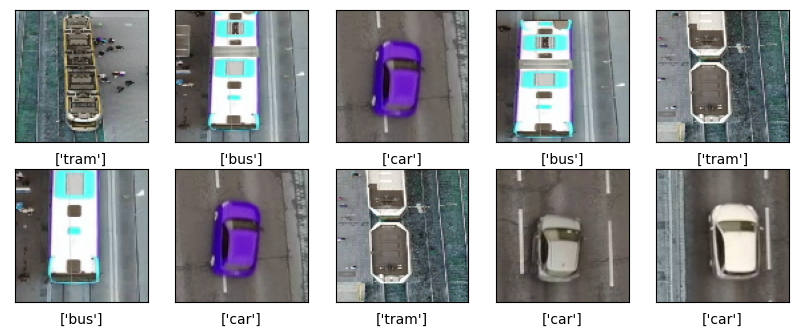

In [4]:
plt.figure(figsize=(10, 10))
for i in range(10):
    num = np.random.randint(0, len(X))
    plt.subplot(5, 5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()





# Etykietowanie danych

In [5]:
# one-hot encoding
# klasy [bus, car, trem] ->  [1, 0, 0], [0, 1, 0], [0, 0, 1] 0, 1, 2
# smieciarz prawnik lekarz 0, 1, 2 
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
if y.shape[1] == 1: # sprawdzamy czy juz wczesniej tego nie zrobilismy 
    y = le.fit_transform(y) #uczy sie jakie sa klasy
    y = to_categorical(y) #binary matrix zmienia z pojec=dyncej wartosci robi liste (one-hot encoding)
y.shape

y = y.astype(int)
y[0]

c:\Users\marci\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0])

# Rozszerzanie danych

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    #height_shift_range=0.2,
    #shear_range=0.2,
    brightness_range=[0.6,1],
    zoom_range=0.2,
    #horizontal_flip=True,
    vertical_flip=True,
    #fill_mode='nearest'
)

#datagen.fit(X)
#rotation_range=10,
#width_shift_range=0.1,
#brightness_range=[0.6,1],
#zoom_range=0.2,
#vertical_flip=True,

In [7]:
for i in range(10):
    X_batch, y_batch = next(datagen.flow(X, y, shuffle=False, batch_size=90)) #iteruje przez generator i zapisuje dane do listy
    X_batch = X_batch.astype(int) # plt nie wyswietli mi floata

    # add 1000 images to X and y
    X = np.concatenate((X, X_batch)) # laczyme x ktorego juz mamy do nowych 
    y = np.concatenate((y, y_batch))
X.shape, y.shape #x tensor

((820, 100, 100, 3), (820, 3))

# Dzielenie danych na treningowe i testowe

In [8]:
from sklearn.model_selection import train_test_split
X = X/255 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # dziele na train i test 80:20
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((656, 100, 100, 3), (164, 100, 100, 3), (656, 3), (164, 3))

c:\Users\marci\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


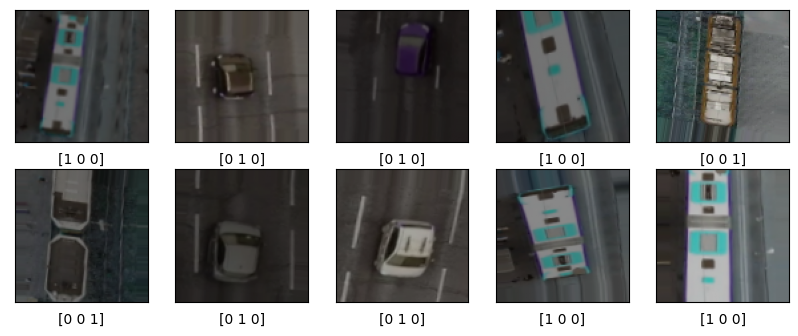

In [9]:
plt.figure(figsize=(10, 10))
for i in range(10):
    num = np.random.randint(0, len(X))
    plt.subplot(5, 5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
dir = Path('data').resolve()

np.save(dir / 'X_train.npy', X_train) # format zapisujacy np.ndarray
np.save(dir / 'X_test.npy', X_test)
np.save(dir / 'y_train.npy', y_train)
np.save(dir / 'y_test.npy', y_test)
